In [1]:
import silq
silq.initialize("EWJN", mode='analysis')
%matplotlib notebook

Initializing imports


<IPython.core.display.Javascript object>

Initializing functions
Initializing data
Initializing analysis
Initializing plotting
Initialization complete


<IPython.core.display.Javascript object>


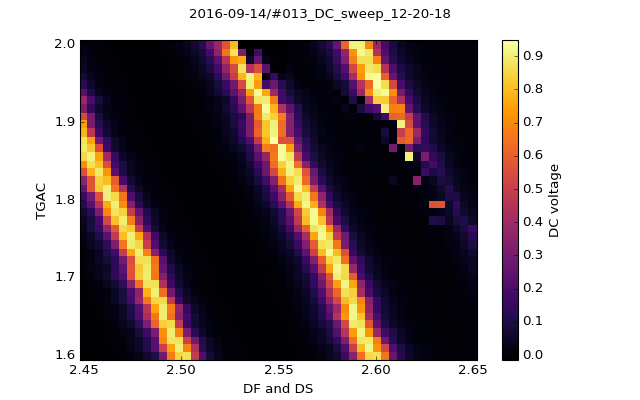

In [2]:
data = qc.load_data('2016-09-14/#013_DC_sweep_12-20-18')
plotQ = qc.MatPlot(data.DC_voltage)

<IPython.core.display.Javascript object>


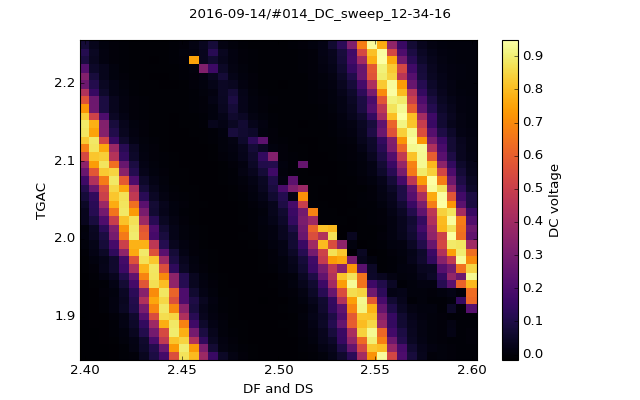

In [3]:
data = qc.load_data('2016-09-14/#014_DC_sweep_12-34-16')
plotQ = qc.MatPlot(data.DC_voltage)

<IPython.core.display.Javascript object>


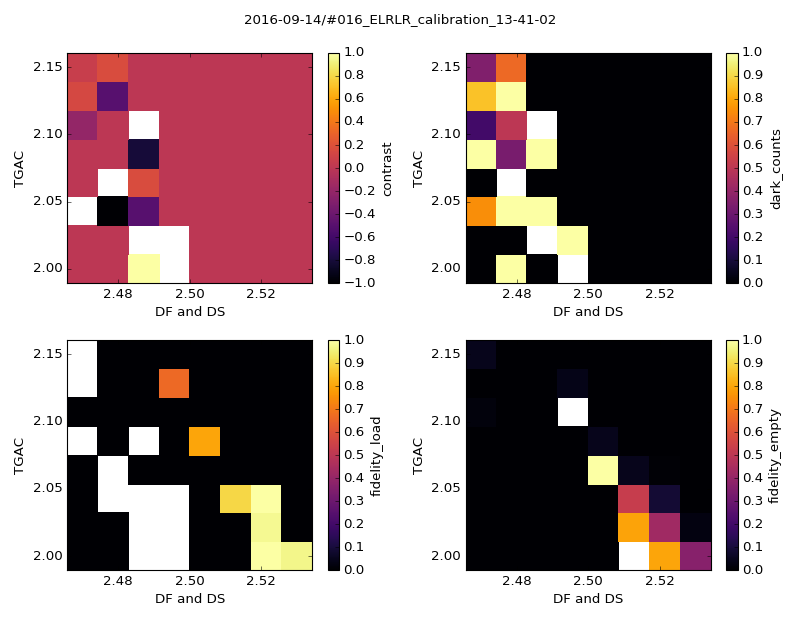

In [4]:
data = qc.load_data('2016-09-14/#016_ELRLR_calibration_13-41-02')

plot = qc.MatPlot(subplots=(2,2), figsize=(10,8))
plot.add(data.contrast, subplot=1, nticks=6)
plot.add(data.dark_counts, subplot=2, nticks=6)
plot.add(data.fidelity_load, subplot=3, nticks=6)
plot.add(data.fidelity_empty, subplot=4, nticks=6)
plot.fig.tight_layout(rect=[0, 0.03, 1, 0.95])

Cannot find a good spot for ELRLR, so I am redoing a DC scan

<IPython.core.display.Javascript object>


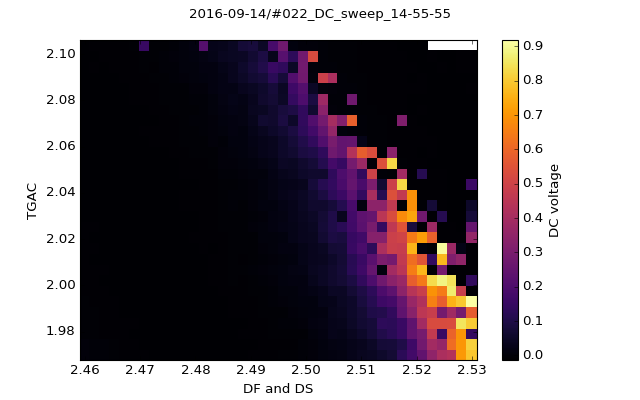

In [5]:
data = qc.load_data('2016-09-14/#022_DC_sweep_14-55-55')
plotQ = qc.MatPlot(data.DC_voltage)

<IPython.core.display.Javascript object>


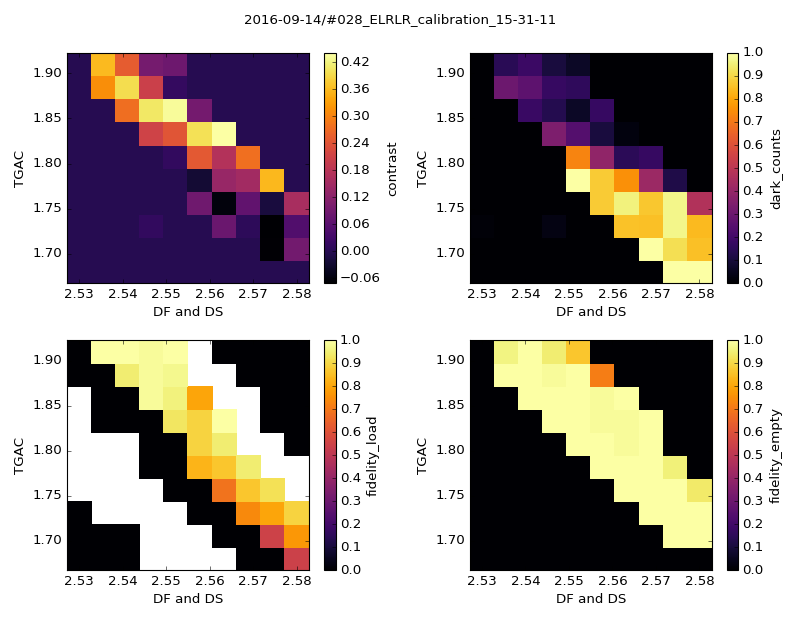

In [6]:
data = qc.load_data('2016-09-14/#028_ELRLR_calibration_15-31-11')

plot = qc.MatPlot(subplots=(2,2), figsize=(10,8))
plot.add(data.contrast, subplot=1, nticks=6)
plot.add(data.dark_counts, subplot=2, nticks=6)
plot.add(data.fidelity_load, subplot=3, nticks=6)
plot.add(data.fidelity_empty, subplot=4, nticks=6)
plot.fig.tight_layout(rect=[0, 0.03, 1, 0.95])

<IPython.core.display.Javascript object>


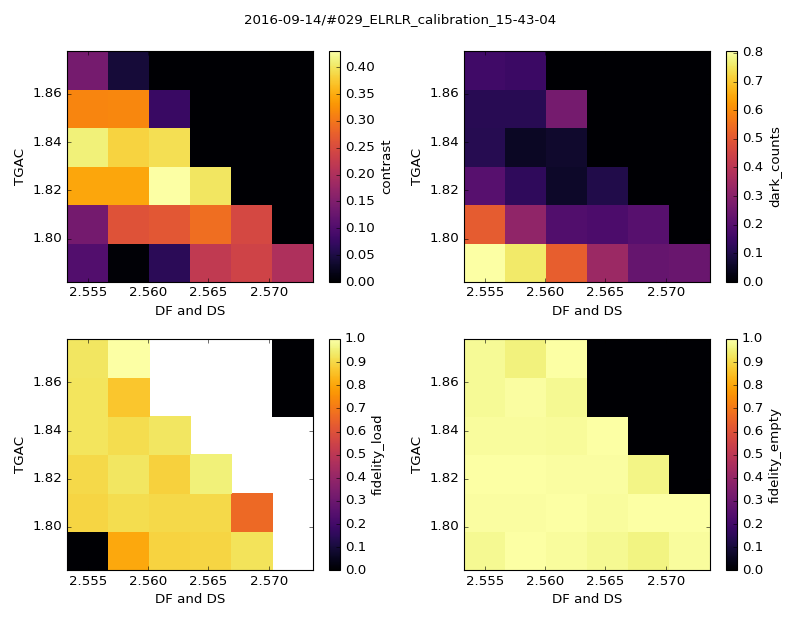

In [7]:
data = qc.load_data('2016-09-14/#029_ELRLR_calibration_15-43-04')

plot = qc.MatPlot(subplots=(2,2), figsize=(10,8))
plot.add(data.contrast, subplot=1, nticks=6)
plot.add(data.dark_counts, subplot=2, nticks=6)
plot.add(data.fidelity_load, subplot=3, nticks=6)
plot.add(data.fidelity_empty, subplot=4, nticks=6)
plot.fig.tight_layout(rect=[0, 0.03, 1, 0.95])

Found perfect spot

<IPython.core.display.Javascript object>


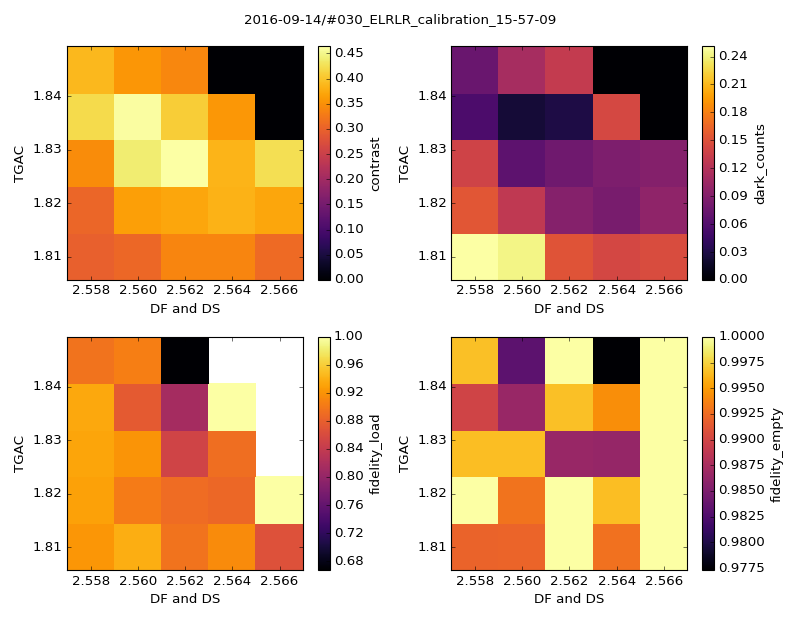

In [8]:
data = qc.load_data('2016-09-14/#030_ELRLR_calibration_15-57-09')

plot = qc.MatPlot(subplots=(2,2), figsize=(10,8))
plot.add(data.contrast, subplot=1, nticks=6)
plot.add(data.dark_counts, subplot=2, nticks=6)
plot.add(data.fidelity_load, subplot=3, nticks=6)
plot.add(data.fidelity_empty, subplot=4, nticks=6)
plot.fig.tight_layout(rect=[0, 0.03, 1, 0.95])

Operating point:
    
TGAC(1.8362)
DF_DS(2.559)

fidelity_empty: 0.990
fidelity_load: 0.880
fidelity_read: 0.783
up_proportion: 0.534
dark_counts: 0.050
contrast: 0.484

<IPython.core.display.Javascript object>


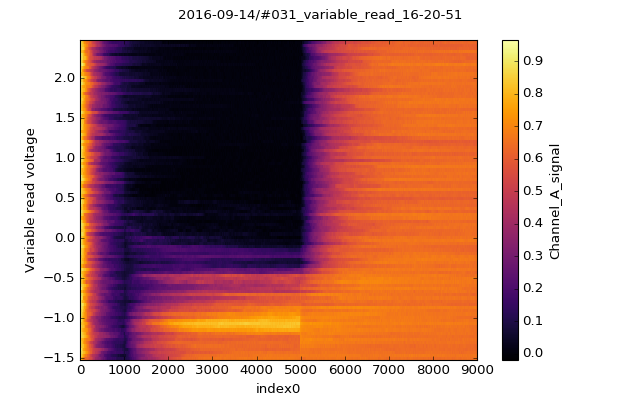

In [9]:
data = qc.load_data('2016-09-14/#031_variable_read_16-20-51')
plot = qc.MatPlot(data.Channel_A_signal)

Number of successful sweeps: 11


<IPython.core.display.Javascript object>


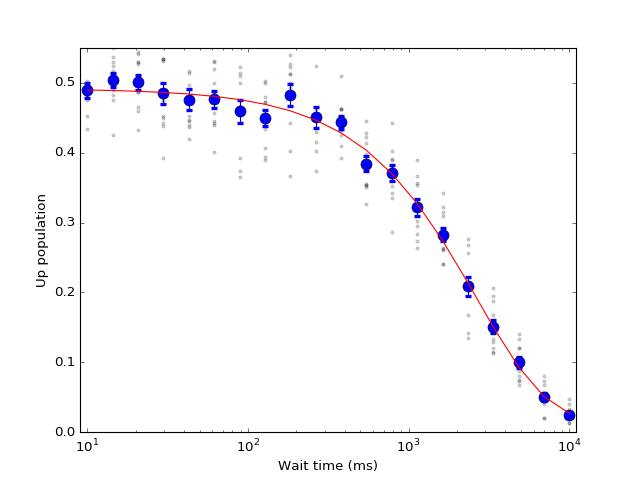

[[Model]]
    Model(fit_function)
[[Fit Statistics]]
    # function evals   = 19
    # data points      = 20
    # variables        = 3
    chi-square         = 618359.271
    reduced chi-square = 36374.075
    Akaike info crit   = 212.782
    Bayesian info crit = 215.769
[[Variables]]
    tau:         2663.92307 +/- 161.4930 (6.06%) (init= 2321.335)
    offset:      0.01569839 +/- 0.011229 (71.53%) (init= 0.02427903)
    amplitude:   0.47596284 +/- 0.011001 (2.31%) (init= 0.5037704)
[[Correlations]] (unreported correlations are <  0.100)
    C(offset, amplitude)         = -0.938 
    C(tau, offset)               = -0.826 
    C(tau, amplitude)            =  0.683 



In [10]:
T1_msmt = T1_Measurement(B0=1.2, location='2016-09-14/#034_T1_data_17-13-07')
T1_msmt.plot_T1()
print(T1_msmt.T1_fit_result.fit_report())